In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
sns.set(rc = {'figure.figsize' : (9,6)})

In [8]:
event_data_train = pd.read_csv('event_data_train.csv')
submissions_data_train = pd.read_csv('submissions_data_train.csv')


In [12]:
event_data_train.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [13]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [18]:
event_data_train.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [19]:
event_data_train['date'] = pd.to_datetime(event_data_train.timestamp, unit = 's')

In [21]:
event_data_train

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [23]:
event_data_train.date.min()

Timestamp('2015-06-15 04:00:48')

In [24]:
event_data_train.date.max()

Timestamp('2018-05-19 23:33:31')

In [26]:
event_data_train['day'] = event_data_train.date.dt.date

In [28]:
event_data_train

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


<AxesSubplot:xlabel='day'>

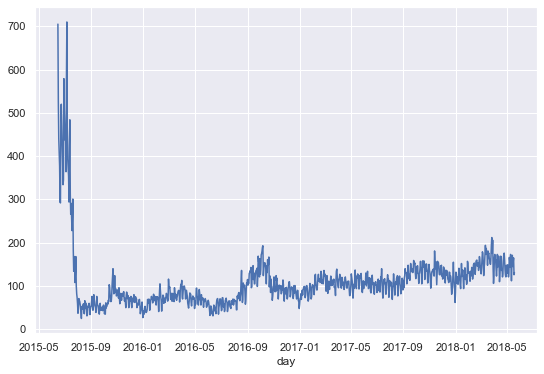

In [35]:
event_data_train.groupby('day')\
.user_id.nunique().plot()

In [36]:
event_data_train.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot:>

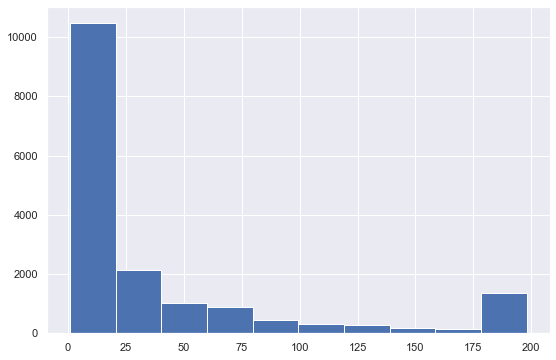

In [42]:
event_data_train[event_data_train.action == 'passed'] \
        .groupby('user_id', as_index = False) \
        .agg({'step_id' : 'count'})\
        .rename(columns = {'step_id' : 'passed_steps'})\
        .passed_steps.hist()
#не учитываю пользователей у которых action != 'passed' 

In [140]:
users_events_data = event_data_train.pivot_table(index = 'user_id', 
                             columns = 'action', 
                            values = 'step_id',
                            aggfunc = 'count',
                            fill_value = 0).reset_index()\
#правильный вариант

In [141]:
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [47]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [48]:
submissions_data_train['date'] = pd.to_datetime(submissions_data_train.timestamp, unit = 's')
submissions_data_train['day'] = submissions_data_train.date.dt.date

In [50]:
users_scores = submissions_data_train.pivot_table(index = 'user_id', 
                             columns = 'submission_status', 
                            values = 'step_id',
                            aggfunc = 'count',
                            fill_value = 0).reset_index()

In [95]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [58]:
gap_data = event_data_train[['user_id', 'day', 'timestamp']]\
.drop_duplicates(subset = ['user_id', 'day'])\
.groupby('user_id')['timestamp'].apply(list)\
.apply(np.diff).values

In [60]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [67]:
gap_data = gap_data / (24 * 60 * 60)

<AxesSubplot:>

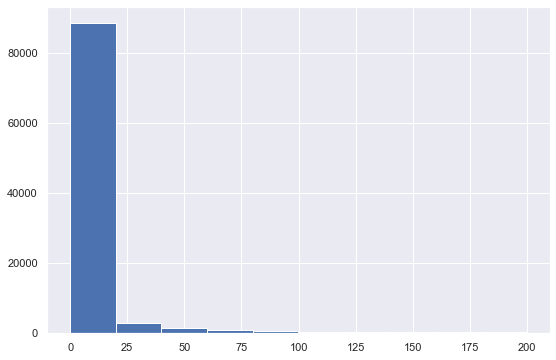

In [68]:
gap_data[gap_data < 200].hist()

In [114]:
gap_data.quantile(0.90)

18.325995370370403

In [116]:
event_data_train.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [121]:
user_data = event_data_train.groupby('user_id', as_index = False)\
.agg({'timestamp' : 'max'}).rename(columns = {'timestamp' : 'last_timestamp'})

In [124]:
now = 1526772811
drop_out = 2592000

In [125]:
user_data['is_gone_user'] = (now - user_data.last_timestamp) > drop_out

In [127]:
user_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [129]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [134]:
user_data = user_data.merge(users_scores, how = 'outer').head()

In [135]:
user_data = user_data.fillna(0)

In [136]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [142]:
user_data = user_data.merge(users_events_data, how = 'outer')

In [144]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1


In [145]:
users_days = event_data_train.groupby('user_id').day.nunique()

In [148]:
users_day = users_days.to_frame().reset_index()

In [149]:
user_data = user_data.merge(users_day, how = 'outer')

In [150]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1


In [151]:
user_data.user_id.nunique()

19234

In [152]:
event_data_train.user_id.nunique()

19234

In [153]:
user_data['passed_course'] = user_data.passed > 170

In [155]:
user_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,5,5,5,5,17809,17809,17809,17809,17809
True,1425,0,0,0,0,1425,1425,1425,1425,1425


In [156]:
100 * 1425 / 17809

8.001572238755685